# 챕터 14 실습 코드들 

챕터 14의 실습에 필요한 코드 예제를 구글 코랩에서 여시려면 [링크](https://colab.research.google.com/drive/1M4gn0eDmkmoBJ6rG6HF_WnTjMWIuUXxA?usp=sharing)를 클릭하시거나 아래의 주소를 웹브라우저에 복사해 주세요. 

https://colab.research.google.com/drive/1M4gn0eDmkmoBJ6rG6HF_WnTjMWIuUXxA?usp=sharing

## 14.2. 실습 준비

### [코드 예제 14.2-1: 실습에 필요한 라이브러리들]

In [1]:
# 필요한 라이브러리 로딩
import numpy as np
import pandas as pd 

# 시각화에 필요한 라이브러리 불러오기 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.ticker as ticker

# 분류모델 학습에 필요한 라이브러리 불러오기 
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  
from sklearn.model_selection import cross_val_score, KFold 
from sklearn.metrics import average_precision_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve  
from sklearn.metrics import roc_auc_score, plot_roc_curve 

### [코드 예제 14.2.1-1: 데이터 불러오기]

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/skku-ai-textbook/aitextbook/main/data/CH13-data1.csv")
print("데이터 셋은 총 {}개의 행과 {}개의 열로 이루어져있습니다".format(*df.shape))

# 첫 5행 출력
df.head(5)

데이터 셋은 총 5000개의 행과 10개의 열로 이루어져있습니다


,age,gender,income,edu,city,smartphone,sns,movieNm,theaterNm,newspaper
0,33,0,6,6,1,1,0,4,1,0
1,79,1,1,2,0,0,0,0,0,0
2,49,0,8,5,1,1,0,5,0,1
3,31,1,1,5,1,1,1,12,0,0
4,55,0,6,5,1,1,1,0,0,1


### [코드 예제 14.2.1-2: 신문기사 열독자 수 확인 및 결측값 확인]

In [3]:
# 신문기사 열독 여부 확인 
print(df['newspaper'].value_counts())

# 결측값이 있는 열 확인
print('\n결측값이 있는 행의 수: {}'.format(df['newspaper'].isnull().sum()))

1    2667
0    2333
Name: newspaper, dtype: int64

결측값이 있는 행의 수: 0


### [코드 예제 14.2.2-2: 분류 모델 실습에 사용할 데이터 시각화] 

In [4]:
# 시각화를 하는데 사용되는 총 9개의 특성들 
df.columns[0:9]

Index(['age', 'gender', 'income', 'edu', 'city', 'smartphone', 'sns',
       'movieNm', 'theaterNm'],
      dtype='object')

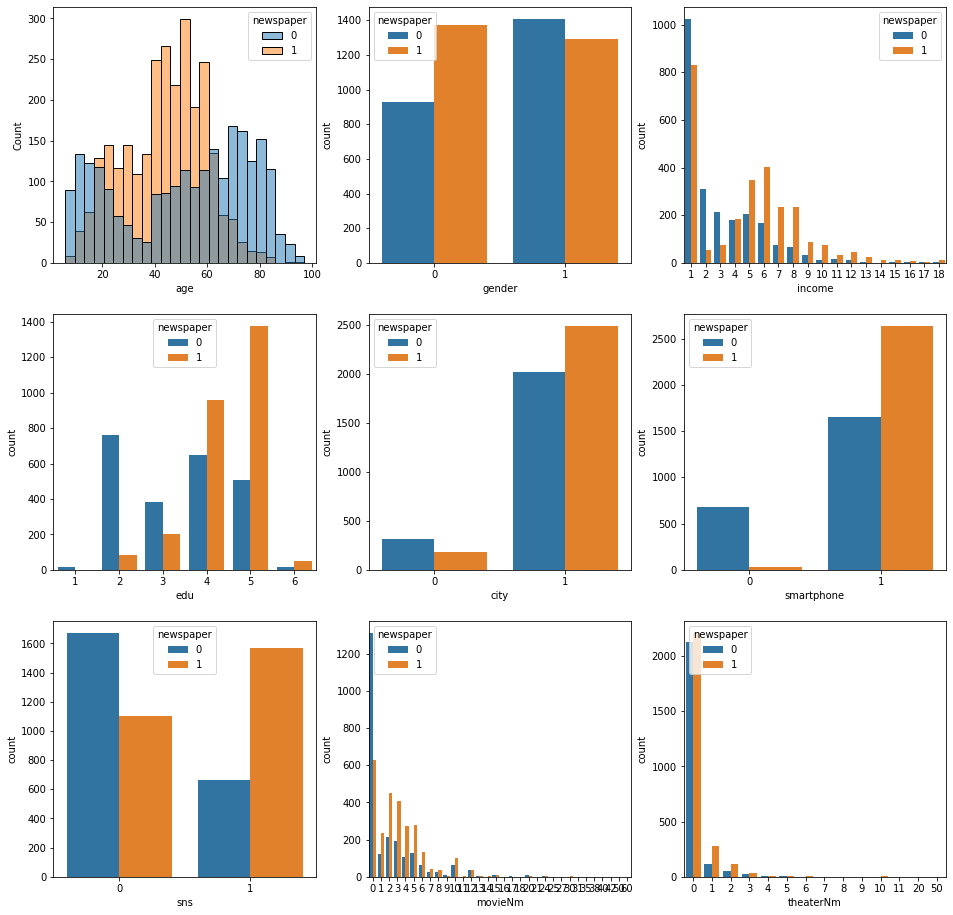

In [5]:
# 캔버스 설정 
figure, axs = plt.subplots(nrows=3, ncols=3) 
figure.set_size_inches(16,16) 

# 신문기사 열독여부 별 나이특성을 분포도로 표시
sns.histplot(data=df, x='age', hue='newspaper', ax=axs[0,0]) 

# 각 특성별의 신문기사 열독여부 차이 시각화 
for i, cols in enumerate(df.columns[1:9]): # 각 특성 선택
  # 8개의 이미지 배치를 위한 i값 설정 
  i=i+1 # 그래프 배치   
  ax = sns.countplot(data=df, x=cols, hue='newspaper', ax=axs[i//3, i%3]) 


## 14.3.	분류 모델 학습 및 평가 


### [코드 예제 14.3.1-1: 학습 및 검증 데이터 준비] 

In [6]:
df.columns

Index(['age', 'gender', 'income', 'edu', 'city', 'smartphone', 'sns',
       'movieNm', 'theaterNm', 'newspaper'],
      dtype='object')

In [7]:
# 데이터 준비
X = df.drop(columns=['newspaper']) # 예측에 활용한 데이터 제거 
Y = df['newspaper']

In [8]:
# 데이터셋을 훈련과 검증 데이터 셋으로 분리 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

# 데이터셋 크기 출력 
print("전체데이터셋의 크기: {0}\n학습데이터셋의 크기: {1} \n검증데이터셋의 크기: {2}\n검증데이터셋의 비율: {3}%"\
      .format(len(df), len(X_train), len(X_test), len(X_test)/len(df)))

전체데이터셋의 크기: 5000
학습데이터셋의 크기: 3750 
검증데이터셋의 크기: 1250
검증데이터셋의 비율: 0.25%


### [코드 예제 14.3.2-1: 분류 모델 학습] 

In [9]:
# 학습에 사용할 특성들 지정 
list_of_features = ['smartphone','sns'] 

# 모델 학습 
print('총 {feat} 개의 특성을 사용하여 신문구독자 분류 모델을 학습합니다'\
      .format(feat=len(X_train[list_of_features].columns))) # 사용되는 특성 갯수 출력

# 학습 모델 선언 
svm = SVC(probability=True)

# 학습 
svm.fit(X_train[list_of_features], y_train)

총 2 개의 특성을 사용하여 신문구독자 분류 모델을 학습합니다


SVC(probability=True)

## 14.4. 분류 모델 평가

### [코드 예제 14.1.1-1: 혼동 행렬 만들기] 

In [10]:
# 검증 데이터셋을 결과 예측
preds = svm.predict(X_test[list_of_features])
cf_matrix = confusion_matrix(y_test, preds)


# 혼동 행렬 출력 
print(cf_matrix)
# 혼동 행렬 값을 변수에 저장
tn, fp, fn, tp = (cf_matrix[0,0], cf_matrix[0, 1], 
                  cf_matrix[1,0], cf_matrix[1,1])

[[180 402]
 [  5 663]]


### [코드 예제 14.4.1-2: 실제 신문기사 열독자 수 출력]

In [11]:
# 실제 신문기사 열독자 수 확인 

print("검증데이터셋에 포함된 응답자 중 실제 신문기사를 읽고 있다고 대답한 응답자의 수: {}".\
      format(len(y_test[y_test==1])))

검증데이터셋에 포함된 응답자 중 실제 신문기사를 읽고 있다고 대답한 응답자의 수: 668


### [코드 예제 14.4.2-1: 혼동행렬 결과를 활용하여 분류모델 평가지표 구하기] 

In [12]:
# 평가지표 계산 
accuracy = (tp+tn)/(tp+fp+tn+fn) # 정확도 
precision = (tp)/(tp+fp) # 정밀도 
recall  = (tp)/(tp+fn) # 재현도 
f1 = 2*(precision*recall)/(precision+recall) #F-1
# 평가 지표 출력 
print("모델 정확도     : {0:.3f}".format(accuracy))
print("모델 정밀도     : {0:.3f}".format(precision))
print("모델 재현도     : {0:.3f}".format(recall))
print("모델 F-1 스코어 : {0:.3f}".format(f1))

모델 정확도     : 0.674
모델 정밀도     : 0.623
모델 재현도     : 0.993
모델 F-1 스코어 : 0.765


### [코드 예제 14.4.2-2: sklearn의 함수를 이용하여 분류모델 평가지표 구하기]

In [13]:
# 평가지표 출력 
accuracy_svm1 = accuracy_score(y_test, preds)
precision_svm1 = precision_score(y_test, preds)
recall_svm1 = recall_score(y_test, preds)
f1_svm1 = f1_score(y_test, preds)
auc_svm1 = roc_auc_score(y_test, preds)

print("모델 정확도    : {s:8.3f}".format(s=accuracy_svm1))
print("모델 정밀도    : {s:8.3f}".format(s=precision_svm1))
print("모델 재현도    : {s:8.3f}".format(s=recall_svm1))
print("모델 F-1스코어 : {s:8.3f}".format(s=f1_svm1))

모델 정확도    :    0.674
모델 정밀도    :    0.623
모델 재현도    :    0.993
모델 F-1스코어 :    0.765


### [코드 예제 14.4.3.-1: 임계치에 따라 신문기사 열독자로 분류되는 응답자의 수 구하기]

In [16]:
# 신문기사 열독자일 확률값 계산 
probs=pd.DataFrame(svm.predict_proba(X_test[list_of_features]))[0]
probs.head()

# 임계값에 따라 신문기사 열독자로 분류되는 응답자의 수를 계산하기 
for i in np.arange(0,1.1,.1):
    print("임계값을 {0:.0f}%로 설정 했을 때 신문기사 열독자로 분류되는 응답자의 수 {1}".\
          format(i*100, len(probs[probs>=i])))

임계값을 0%로 설정 했을 때 신문기사 열독자로 분류되는 응답자의 수 1250
임계값을 10%로 설정 했을 때 신문기사 열독자로 분류되는 응답자의 수 1250
임계값을 20%로 설정 했을 때 신문기사 열독자로 분류되는 응답자의 수 1250
임계값을 30%로 설정 했을 때 신문기사 열독자로 분류되는 응답자의 수 1250
임계값을 40%로 설정 했을 때 신문기사 열독자로 분류되는 응답자의 수 185
임계값을 50%로 설정 했을 때 신문기사 열독자로 분류되는 응답자의 수 185
임계값을 60%로 설정 했을 때 신문기사 열독자로 분류되는 응답자의 수 185
임계값을 70%로 설정 했을 때 신문기사 열독자로 분류되는 응답자의 수 185
임계값을 80%로 설정 했을 때 신문기사 열독자로 분류되는 응답자의 수 185
임계값을 90%로 설정 했을 때 신문기사 열독자로 분류되는 응답자의 수 185
임계값을 100%로 설정 했을 때 신문기사 열독자로 분류되는 응답자의 수 0


### [코드 예제 14.4.3-2: plot_roc_curve를 사용한 ROC 커브 그리기]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


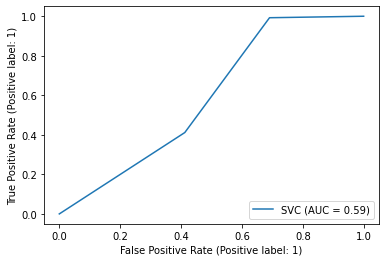

In [17]:
#plot_roc_curve 펑션을 통한 ROC커브 그리기 
plot_roc_curve(svm, X_test[list_of_features], y_test) 
plt.show()       

## 14.5. 모델 성능 개선

In [18]:
# 특성 추가 
list_of_features2 = ['smartphone','sns','age', 'gender','income','edu','city']

# 모델 학습 
svm2 = SVC(probability=True)
svm2.fit(X_train[list_of_features2], y_train)

# 검증 및 성능 평가 
preds2 = svm2.predict(X_test[list_of_features2]) 
print(confusion_matrix(y_test, preds2))

# 정확도, 정밀도, 재현도, F1-score등 평가지표 구하기 
accuracy_svm2 = accuracy_score(y_test, preds2)
precision_svm2 = precision_score(y_test, preds2)
recall_svm2 = recall_score(y_test, preds2)
f1_svm2 = f1_score(y_test, preds2)
auc_svm2 = roc_auc_score(y_test, preds2)


#평가지표 출력 
print("\n정확도    : {s:8.3f}".format(s=accuracy_svm2))
print("정밀도    : {s:8.3f}".format(s=precision_svm2))
print("재현도    : {s:8.3f}".format(s=recall_svm2))
print("F-1스코어 : {s:8.3f}".format(s=f1_svm2))

[[338 244]
 [105 563]]

정확도    :    0.721
정밀도    :    0.698
재현도    :    0.843
F-1스코어 :    0.763


### [코드 예제 14.5.1-2: 새로운 모델의 ROC 커브 그리기] 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


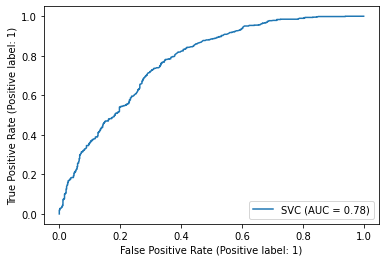

In [19]:
#plot_roc_curve 펑션을 통한 ROC커브 그리기 
plot_roc_curve(svm2, X_test[list_of_features2], y_test) 
plt.show()       

### [코드 예제 14.5.2-1: 모든 변수를 투입한 모델 학습] 

[[346 236]
 [113 555]]

정확도    :    0.721
정밀도    :    0.702
재현도    :    0.831
F-1스코어 :    0.761


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


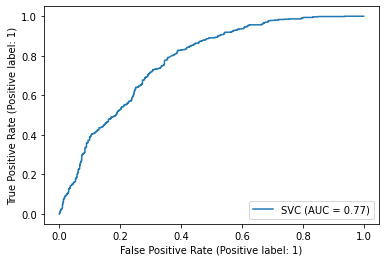

In [22]:
# 학습에 사용할 특성 지정
list_of_features3 = ['smartphone','sns','age', 'gender',
                     'income','edu','city','movieNm','theaterNm']

# 분류 모델 학습
svm3= SVC(probability=True)
svm3.fit(X_train[list_of_features3], y_train)

# 분류   
preds3 = svm3.predict(X_test[list_of_features3])

# 혼동행렬 출력 
print(confusion_matrix(y_test, preds3))

# 평가지표 
accuracy_svm3 = accuracy_score(y_test, preds3)
precision_svm3 = precision_score(y_test, preds3)
recall_svm3 = recall_score(y_test, preds3)
f1_svm3 = f1_score(y_test, preds3)
auc_svm3 = roc_auc_score(y_test, preds3)

#평가지표 출력 
print("\n정확도    : {s:8.3f}".format(s=accuracy_svm3))
print("정밀도    : {s:8.3f}".format(s=precision_svm3))
print("재현도    : {s:8.3f}".format(s=recall_svm3))
print("F-1스코어 : {s:8.3f}".format(s=f1_svm3))

#ROC Curve 그리기
plot_roc_curve(svm3, X_test[list_of_features3], y_test) 
plt.show()       

### [코드 예제 14.5.4-1: 분류 모델 K-겹 교차 검증] 

In [23]:
# K-fold 교차 검증 설정
folds = KFold(n_splits = 5, shuffle = True, random_state = 83731)

# 모델 선언 
svc = SVC(probability=True)

# 평가지표 계산 
accuracy_SVM = cross_val_score(svc, X, Y, scoring='accuracy', cv=folds) # 정확도 
precision_SVM = cross_val_score(svc, X, Y, scoring='precision', cv=folds) #정밀도
recall_SVM = cross_val_score(svc, X, Y, scoring='recall', cv=folds) #재현도
f1_SVM = cross_val_score(svc, X, Y, scoring='f1', cv=folds) #f1-스코어
roc_auc_SVM = cross_val_score(svc, X, Y, scoring='roc_auc', cv=folds) #AUC 

#평가지표 출력 
print("\n정확도 평균: {s:8.3f}".format(s=accuracy_SVM.mean()))
print("정밀도 평균: {s:8.3f}".format(s=precision_SVM.mean()))
print("재현도 평균: {s:8.3f}".format(s=recall_SVM.mean()))
print("F-1스코어 평균: {s:8.3f}".format(s=f1_SVM.mean()))
print("AUC커브 평균: {s:8.3f}".format(s=roc_auc_SVM.mean()))


정확도 평균:    0.733
정밀도 평균:    0.706
재현도 평균:    0.856
F-1스코어 평균:    0.774
AUC커브 평균:    0.784
